In [8]:
# Importing packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

              name sample_ID  Age  gender        bmi      height  \
0  Sandra Williams  sid_0001   75  female  25.412903  161.082389   
1        Maria Lin  sid_0002   85  female  27.386392  178.389131   
2     Mark Compton  sid_0003   37    male  25.418680  184.598896   
3       Sally Moss  sid_0004   81  female  27.849098  155.127998   
4        John Moon  sid_0005   51    male  26.286107  181.656045   

         country               city Education Level  SNP1  ...     gene 2  \
0         Canada           Lynnwood     high school     2  ...  12.145523   
1         Canada           Anderson        bachelor     2  ...   8.981231   
2  United States    Fountain Valley     high school     2  ...   7.280951   
3  United States          Willetton        bachelor     2  ...   6.517843   
4      Australia  Bainbridge Island     high school     1  ...   4.829872   

      gene 3     gene 4    gene 5     gene 6     gene 7     gene 8     gene 9  \
0   5.584850   1.431837  0.438891   0.000000   

'/Users/jessie/Desktop/HDA/Clinical Data Management/CDM_WK8/gene_expression_heatmap.png'

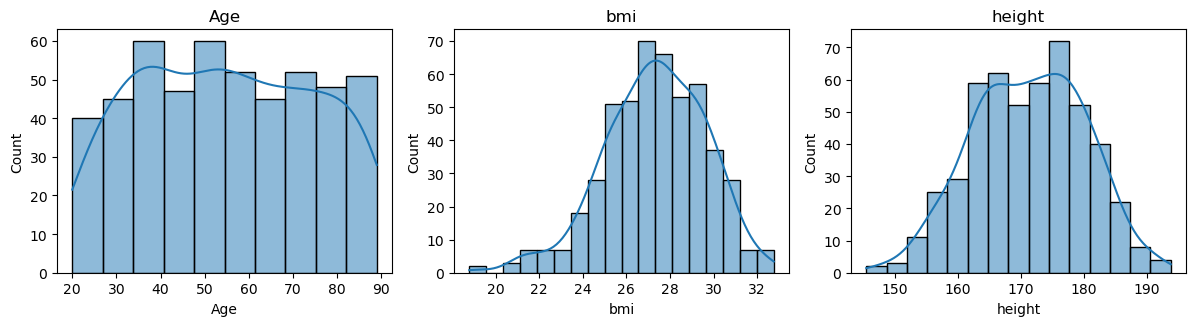

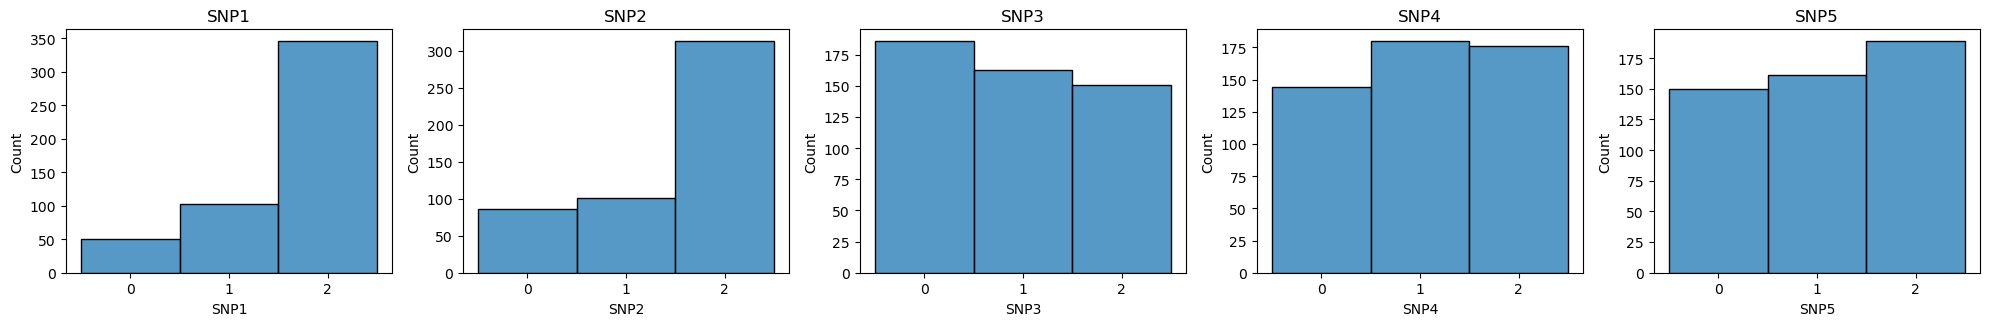

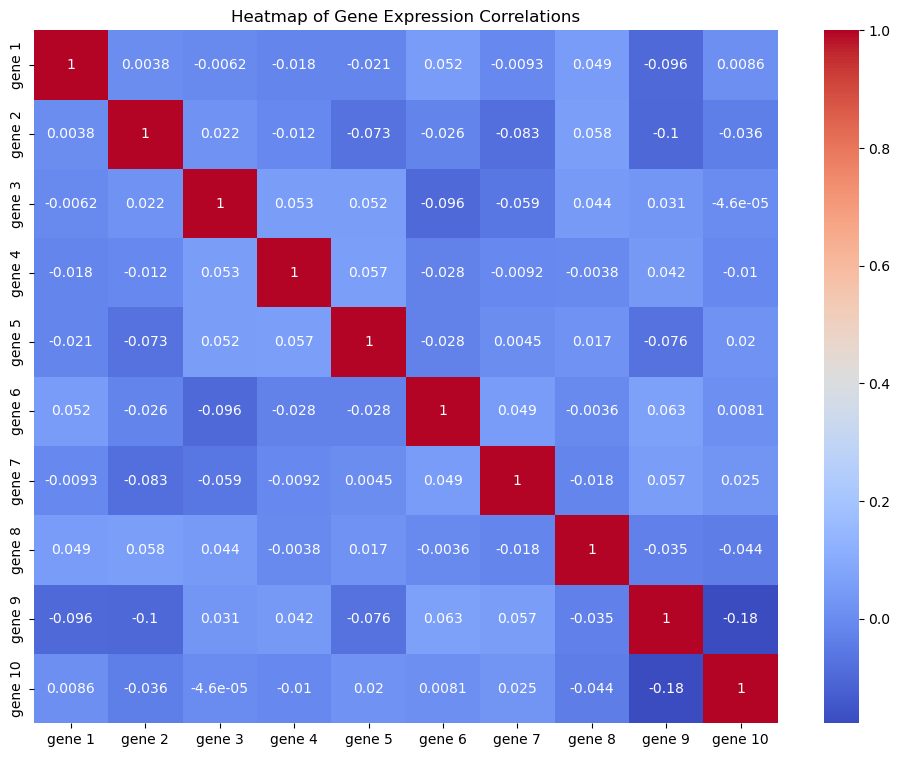

In [16]:
os.chdir('/Users/jessie/Desktop/HDA/Clinical Data Management/CDM_WK8/Data_Simulation/Data_Simulation')
data = pd.read_csv('our_fake_data.csv')
print(data.head())  # Print the first few rows of the DataFrame

# Filtering out the gene columns and the 'case' column
non_gene_snp_case_columns = [col for col in data.columns if 'gene' not in col and 'SNP' not in col and col != 'case']

# Selecting only the numeric columns for distribution plots, excluding gene and case columns
filtered_numeric_columns = data[non_gene_snp_case_columns].select_dtypes(include=['float64', 'int64']).columns

# Plotting distribution plots for the filtered numeric columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(filtered_numeric_columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()

# Saving the distribution plots
distribution_plot_path = '/Users/jessie/Desktop/HDA/Clinical Data Management/CDM_WK8/distribution_plots.png'
plt.savefig(distribution_plot_path)

distribution_plot_path

# Since we need to focus on SNP columns, we'll filter those out and modify the plots accordingly.
# SNP columns are typically categorical with values 0, 1, and 2.
snp_columns = [col for col in data.columns if 'SNP' in col]

# Plotting distribution plots for all SNP columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(snp_columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(data[column], bins=[-0.5, 0.5, 1.5, 2.5], kde=False)
    plt.xticks([0, 1, 2])
    plt.title(column)
plt.tight_layout()

# Saving the modified distribution plots
snp_distribution_plot_path = '/Users/jessie/Desktop/HDA/Clinical Data Management/CDM_WK8/snp_distribution_plots.png'
plt.savefig(snp_distribution_plot_path)

snp_distribution_plot_path


# For the heatmap, we'll focus on the gene expression columns (gene 1 to gene 10)
gene_columns = [col for col in data.columns if 'gene' in col]
gene_data = data[gene_columns]

# Creating a heatmap for gene expression
plt.figure(figsize=(12, 9))
sns.heatmap(gene_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Gene Expression Correlations')

# Saving the heatmap
heatmap_path = '/Users/jessie/Desktop/HDA/Clinical Data Management/CDM_WK8/gene_expression_heatmap.png'
plt.savefig(heatmap_path)

heatmap_path